# Multimodal data analysis using the CANDOR corpus

We will be analysing the CANDOR dataset containing multimodal interaction data.

See more about the corpus in the [paper by Reece et al., 2023](https://www.science.org/doi/10.1126/sciadv.adf3197).

In order to directly apply this notebook, you need to pre-process the data and flatten the original nested directory structure of the CANDOR corpus. You can do that using the [candor_process_dir.ipynb](https://github.com/liri-uzh/CANDOR_corpus_processing_and_analysis/blob/main/process_candor_dir.ipynb) file.


If you are accessing the files from the Google Drive, you need to mount it first.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the library to mount Google Drive
from google.colab import drive

# Mount the Google Drive at /content/drive
# you need to run this only once, and repeat in case of session time out
# drive.mount('/content/drive')

# Verify by listing the files in the drive
!ls /content/drive/

MyDrive  Othercomputers  Shareddrives


In [ ]:
import os

# specify the path to dir on your drive / shared folder
INPUT_DIRECTORY = "/content/drive/MyDrive/DSI_multimodal_HS24"

# check if it works :)
content = sorted([item for item in os.listdir(INPUT_DIRECTORY)])
print(len(content))


4


# Data exploration

First, explore the content of each interview file containing audio-video veatures. The corpus contains various acoustic and visual measurements, such as the fundamental frequency (f0), facial expressions, gaze and head movements.

You will see that for each speaker (user_id), there is a row with values for each second (timedelta).

Note that if you pre-processed the data using the repository linked above, some of the columns have been removed for simplicity.


In [ ]:
import pandas as pd

def load_file_and_show_columns(file_path):
    # Load the CSV file as DataFrame
    df = pd.read_csv(file_path)

    # Display the filename and column names
    print(f"Loaded file: {file_path}")
    print("Column names:", df.columns.tolist())

    print("\nFirst row of data:")
    print(df.head(10))


# Usage example
sample_file_path = '/content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_100_audio_video_features.csv'
df = load_file_and_show_columns(sample_file_path)

Loaded file: /content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_100_audio_video_features.csv
Column names: ['timedelta', 'user_id', 'f0', 'gaze_on', 'nod_no', 'nod_yes', 'prob_face_anger', 'prob_face_contempt', 'prob_face_disgust', 'prob_face_fear', 'prob_face_happiness', 'prob_face_neutral', 'prob_face_sadness', 'prob_face_surprise', 'smile', 'is_speaking', 'f0_norm']

First row of data:
  timedelta                   user_id          f0  gaze_on  nod_no  nod_yes  \
0  00:00:00  5d96fe713cc967001852334f         NaN      NaN     NaN      NaN   
1  00:00:00  5f6dc2d7fa66e824dbf70d24         NaN      NaN     NaN      NaN   
2  00:00:01  5d96fe713cc967001852334f         NaN      NaN     NaN      NaN   
3  00:00:01  5f6dc2d7fa66e824dbf70d24  190.938419      NaN     NaN      NaN   
4  00:00:02  5d96fe713cc967001852334f         NaN      NaN     NaN      NaN   
5  00:00:02  5f6dc2d7fa66e824dbf70d24  184.220607      NaN     NaN      NaN   
6  00:00:03  5d96fe713cc967001852334f  

# Check variable values

- Explore the range of values in a column. Note that in the code below, speakers are not separated. Values are analyzed for the whole interview.

- Plot their distribution. Here we are using the histogram plot, but you can try different visualizations to analyse the disctribution.

- Do this for several variables in several files to see how distributions vary. You can do this by changing the file path and the variable name.

Statistics for column 'f0_norm':
  Min: 0.0
  Max: 1.0
  Median: 0.2554467534045842
  Average: 0.2687071418805596


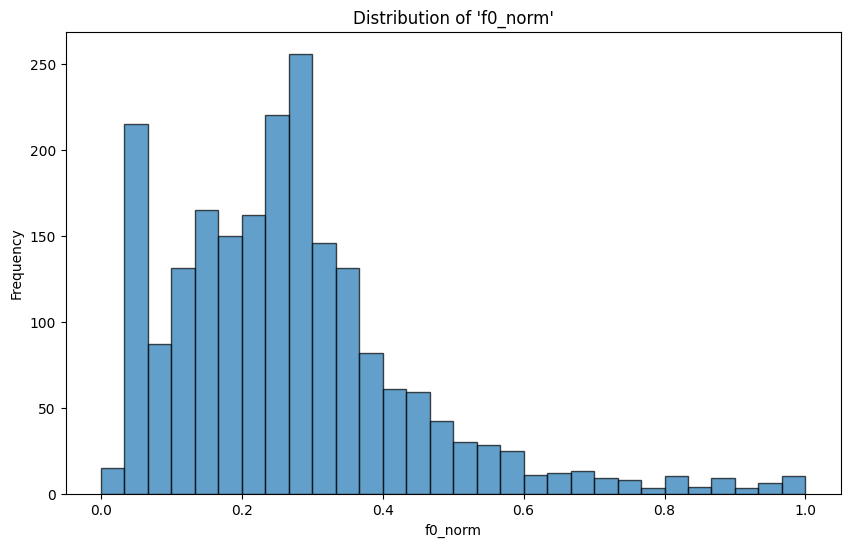

In [ ]:
# import pandas as pd
import matplotlib.pyplot as plt

def analyze_and_plot_column(file_path, column_name):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Check if the column exists
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the file.")
        return

    # Drop NaN values in the specified column
    data = df[column_name].dropna()

    # Calculate statistics
    min_value = data.min()
    max_value = data.max()
    median_value = data.median()
    average_value = data.mean()

    # Print the statistics
    print(f"Statistics for column '{column_name}':")
    print(f"  Min: {min_value}")
    print(f"  Max: {max_value}")
    print(f"  Median: {median_value}")
    print(f"  Average: {average_value}")

    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=30, alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of '{column_name}'")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

# using the function
sample_file_path = '/content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_100_audio_video_features.csv'
analyze_and_plot_column(sample_file_path, 'f0_norm')

# Explore data for each user

Repeat steps from the previous block, but split into different speakers to see individual differences.
E.g., compare speakers in files 21 and 19.


Statistics for user_id '5da8ded81844f20015bf9a62' in column 'f0_norm':
  Min: 0.0
  Max: 1.0
  Median: 0.3798888504993493
  Average: 0.4127920816210111


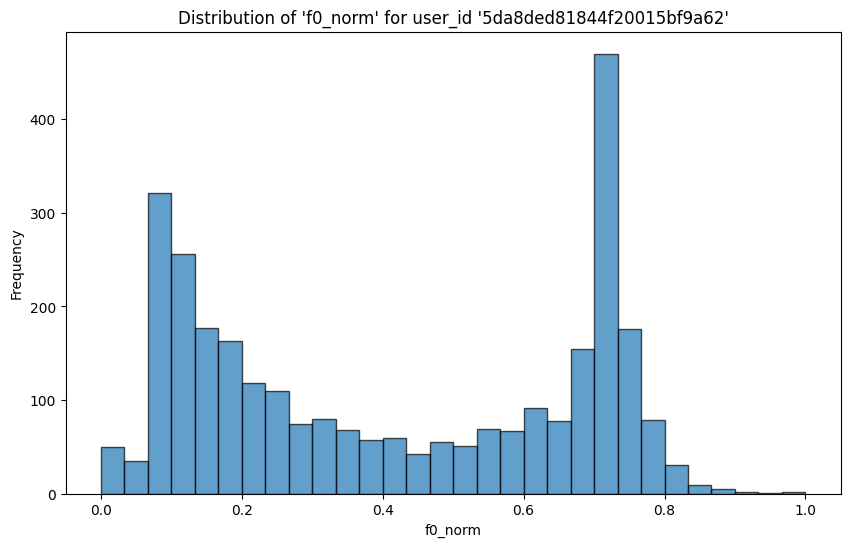


Statistics for user_id '5ea5ba46461d105ac7fdb4fb' in column 'f0_norm':
  Min: 0.0
  Max: 1.0
  Median: 0.22731684395153115
  Average: 0.2583462551662737


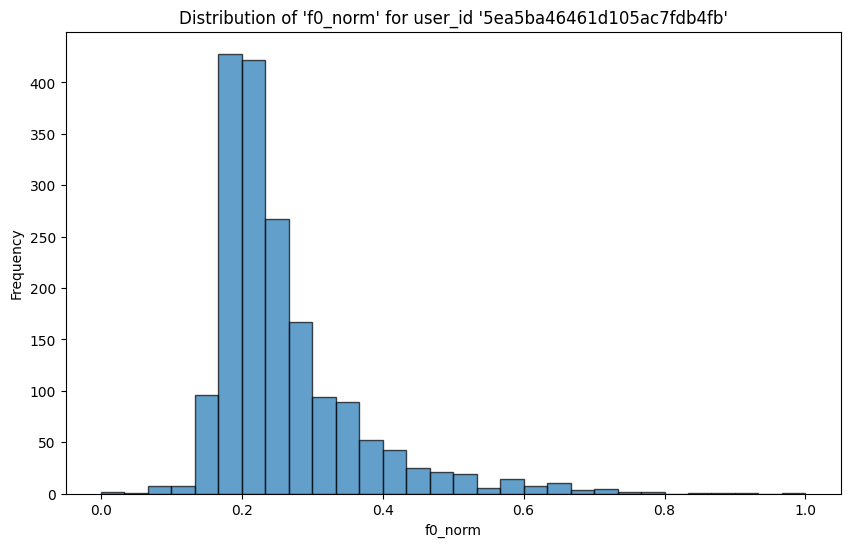

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_and_plot_column_per_user(file_path, column_name):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Check if the column exists
    if column_name not in df.columns or 'user_id' not in df.columns:
        print(f"Column '{column_name}' or 'user_id' not found in the file.")
        return

    # Group by user_id
    user_groups = df.groupby('user_id')

    # Loop through each user_id group and collect statistics and plots for up to 2 users
    user_count = 0
    for user_id, group in user_groups:
        if user_count >= 2:  # Limit to 2 users
            break

        # Drop NaN values in the specified column for this user
        data = group[column_name].dropna()

        if data.empty:
            print(f"No data available for user_id '{user_id}' in column '{column_name}'.")
            continue

        # Calculate statistics
        min_value = data.min()
        max_value = data.max()
        median_value = data.median()
        average_value = data.mean()

        # Display the statistics for this user
        print(f"\nStatistics for user_id '{user_id}' in column '{column_name}':")
        print(f"  Min: {min_value}")
        print(f"  Max: {max_value}")
        print(f"  Median: {median_value}")
        print(f"  Average: {average_value}")

        # Plot the distribution for this user
        plt.figure(figsize=(10, 6))
        plt.hist(data, bins=30, alpha=0.7, edgecolor='black')
        plt.title(f"Distribution of '{column_name}' for user_id '{user_id}'")
        plt.xlabel(column_name)
        plt.ylabel("Frequency")
        plt.show()

        user_count += 1

# Using the function
sample_file_path = '/content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_21_audio_video_features.csv'
analyze_and_plot_column_per_user(sample_file_path, 'f0_norm')

# Analysis of co-occurring patterns

## Co-occurrence of two variables

Find coocurrences including 2 variables that happen at the same time (value of 2 variables higher than the given value in the same row).

Examples:

 - when a speaker is smiling in surprise.

 - when a speaker is happy and contempt at the same time.

 In the code below, we are analysing only one file. You can do this analysis across more files.



In [ ]:
# finding coocurrences with 2 variables
def coocurrence_two(file_path, value, var1, var2):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Filter rows where both prob_face_anger and prob_face_disgust are greater than 0.5
    high_prob_df = df[(df[var1] > value) & (df[var2] > value)]

    # Count the occurrences
    occurrence_count = len(high_prob_df)

    # Extract start and stop columns for matching rows
    result = high_prob_df[['timedelta', "user_id", var1, var2]]

    if occurrence_count > 0:
        # Display or process the result
        print("filename:", file_path)
        print("Extracted time values for matching rows:")
        print(result)
        print(f"\nTotal occurrences where both {var1} and {var2} are greater than {value}: {occurrence_count}")

# Using the function
sample_file_path = '/content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_21_audio_video_features.csv'
coocurrence_two(sample_file_path, 0.1,"prob_face_contempt", "prob_face_happiness" )

filename: /content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_21_audio_video_features.csv
Extracted time values for matching rows:
     timedelta                   user_id  prob_face_contempt  \
2     00:00:01  5da8ded81844f20015bf9a62            0.130486   
102   00:00:51  5da8ded81844f20015bf9a62            0.108504   
104   00:00:52  5da8ded81844f20015bf9a62            0.138552   
106   00:00:53  5da8ded81844f20015bf9a62            0.115636   
108   00:00:54  5da8ded81844f20015bf9a62            0.120250   
...        ...                       ...                 ...   
6389  00:53:14  5ea5ba46461d105ac7fdb4fb            0.256132   
6391  00:53:15  5ea5ba46461d105ac7fdb4fb            0.213504   
6393  00:53:16  5ea5ba46461d105ac7fdb4fb            0.232432   
6395  00:53:17  5ea5ba46461d105ac7fdb4fb            0.221039   
6397  00:53:18  5ea5ba46461d105ac7fdb4fb            0.207144   

      prob_face_happiness  
2                0.276332  
102              0.144041  
1

## Co-occurrence of three variables

Examples:

- "prob_face_contempt", "prob_face_happiness", "smile"
- "prob_face_contempt", "prob_face_happiness", "nod_yes"

In the code below, the thresshold is set at 0.4, but you can try adjusting different criteria.

In [ ]:

def coocurrence_three(file_path, value, var1, var2, var3):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Filter rows where both prob_face_anger and prob_face_disgust are greater than 0.5
    high_prob_df = df[(df[var1] > value) & (df[var2] > value) & (df[var3] > value)]

    # Count the occurrences
    occurrence_count = len(high_prob_df)

    # Extract start and stop columns for matching rows
    result = high_prob_df[['timedelta', "user_id", var1, var2, var3]]

    if occurrence_count > 0:
        # Display or process the result
        print("filename:", file_path)
        print("Extracted time values for matching rows:")
        print(result)
        print(f"\nTotal occurrences where both {var1} and {var2} are greater than {value}: {occurrence_count}")

# Using
sample_file_path = '/content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_21_audio_video_features.csv'
coocurrence_three(sample_file_path, 0.4,"prob_face_contempt", "prob_face_happiness", "smile")

filename: /content/drive/MyDrive/DSI_multimodal_HS24/CANDOR_flattened/intrvw_21_audio_video_features.csv
Extracted time values for matching rows:
     timedelta                   user_id  prob_face_contempt  \
229   00:01:54  5ea5ba46461d105ac7fdb4fb            0.444584   
521   00:04:20  5ea5ba46461d105ac7fdb4fb            0.440765   
523   00:04:21  5ea5ba46461d105ac7fdb4fb            0.484494   
525   00:04:22  5ea5ba46461d105ac7fdb4fb            0.436316   
527   00:04:23  5ea5ba46461d105ac7fdb4fb            0.449072   
529   00:04:24  5ea5ba46461d105ac7fdb4fb            0.418351   
795   00:06:37  5ea5ba46461d105ac7fdb4fb            0.421691   
797   00:06:38  5ea5ba46461d105ac7fdb4fb            0.462717   
4789  00:39:54  5ea5ba46461d105ac7fdb4fb            0.426493   
4795  00:39:57  5ea5ba46461d105ac7fdb4fb            0.458442   
4799  00:39:59  5ea5ba46461d105ac7fdb4fb            0.465647   
4931  00:41:05  5ea5ba46461d105ac7fdb4fb            0.471875   
5429  00:45:14  5ea5ba

In [ ]:
# HOMEWORK: what happens with one person to elicit a specific pattern of reaction
# for example: what makes someone say "I know, right?". In terms of their emotions, words, facial expression
# try to query different interactions in sequence, or co-occuring
# ex. define window of 5sec where a set of events occurs, by
# looking at 1 line at a time, and seeing if there's an event of relevance in the next 5 lines from the other user


# Same conditions across multiple files
in the code block below, we apply that to multiple files, but also...

# Set up more adjustable conditions for querying

- time window
- multiple variables
- for a single user

In [ ]:

def extract_data_with_conditions(file_path, time_window=5, threshold=0.5, *variables):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Convert the 'timedelta' column to timedelta format for time manipulation
    df['timedelta'] = pd.to_timedelta(df['timedelta'])

    # Loop through each unique user
    for user_id in df['user_id'].dropna().unique():
        # Start by filtering data for the specific user
        user_df = df[df['user_id'] == user_id]

        # Apply the condition to check if all specified variables are above the threshold
        for var in variables:
            user_df = user_df[user_df[var] > threshold]

        # Sort by 'timedelta' to ensure time order
        user_df = user_df.sort_values(by='timedelta')

        if not user_df.empty:
            # Define the time window starting from the first matching row
            start_time = user_df['timedelta'].min()
            end_time = start_time + pd.Timedelta(seconds=time_window)

            # Extract data within the 5-second window
            within_window = user_df[(user_df['timedelta'] >= start_time) & (user_df['timedelta'] < end_time)]

            # Display results for this user within the window
            print(
                f"\nExtracted data for user {user_id} within a {time_window}-second window for variables {variables}:")
            print(within_window[['timedelta', 'user_id'] + list(variables)])


# Repeated for convenience
# specify the path to dir on your drive / shared folder
INPUT_DIRECTORY = "/content/drive/MyDrive/coursework/DSI_multimodal_HS24/CANDOR_flattened"

# check if it works :) (there should be 720 files)
files = sorted([file for file in os.listdir(INPUT_DIRECTORY)])

for file in files:
    file_path = os.path.join(INPUT_DIRECTORY, file)
    if "features" in file_path:
        # Extracting data for user within a 5-second window where 'prob_face_anger' and 'prob_face_disgust' are both greater than 0.5
        # extract_data_with_conditions(file_path, 5, 0.2, 'prob_face_surprise', 'nod_no')
        extract_data_with_conditions(file_path, 5, 0.2, 'prob_face_surprise', 'smile')




Extracted data for user 5d96fe713cc967001852334f within a 5-second window for variables ('prob_face_surprise', 'smile'):
          timedelta                   user_id  prob_face_surprise  smile
930 0 days 00:07:45  5d96fe713cc967001852334f            0.281683    1.0

Extracted data for user 5f6dc2d7fa66e824dbf70d24 within a 5-second window for variables ('prob_face_surprise', 'smile'):
          timedelta                   user_id  prob_face_surprise  smile
607 0 days 00:05:03  5f6dc2d7fa66e824dbf70d24            0.454428    1.0

Extracted data for user 5efabf3ac16df890cee2b41e within a 5-second window for variables ('prob_face_surprise', 'smile'):
           timedelta                   user_id  prob_face_surprise  smile
1244 0 days 00:10:22  5efabf3ac16df890cee2b41e             0.28082    1.0

Extracted data for user 5efe907ba8384039f55a9625 within a 5-second window for variables ('prob_face_surprise', 'smile'):
         timedelta                   user_id  prob_face_surprise  smile


# Store output in a file in the
- CANDOR_processed directory
- filename generated based on the variables chosen

In [ ]:
import os
import pandas as pd

def extract_data_with_conditions(file_path, output_directory, all_data, time_window=5, threshold=0.5, *variables):
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Convert the 'timedelta' column to timedelta format for time manipulation
    df['timedelta'] = pd.to_timedelta(df['timedelta'])

    # Get the base filename without extension for the output file
    base_filename = os.path.splitext(os.path.basename(file_path))[0]

    # Loop through each unique user
    for user_id in df['user_id'].dropna().unique():
        # Start by filtering data for the specific user
        user_df = df[df['user_id'] == user_id]

        # Apply the condition to check if all specified variables are above the threshold
        for var in variables:
            user_df = user_df[user_df[var] > threshold]

        # Sort by 'timedelta' to ensure time order
        user_df = user_df.sort_values(by='timedelta')

        if not user_df.empty:
            # Define the time window starting from the first matching row
            start_time = user_df['timedelta'].min()
            end_time = start_time + pd.Timedelta(seconds=time_window)

            # Extract data within the 5-second window
            within_window = user_df[(user_df['timedelta'] >= start_time) & (user_df['timedelta'] < end_time)]

            # Save results for this user within the window to a DataFrame
            output_df = within_window[['timedelta', 'user_id'] + list(variables)]

            # Append this user's data to the combined DataFrame
            all_data.append(output_df)

            # Create the output filename using user_id and variables
            output_filename = f"{base_filename}_user_{user_id}_vars_{'_'.join(variables)}.csv"
            output_path = os.path.join(output_directory, output_filename)

            # Save the DataFrame to CSV for individual user file
            output_df.to_csv(output_path, index=False)
            print(f"Saved extracted data to: {output_path}")

def save_all_data_to_file(output_directory, all_data, *variables):
    # Concatenate all collected data into a single DataFrame
    combined_df = pd.concat(all_data, ignore_index=True)

    # Define the filename with "all" prefix and variable names
    all_filename = f"all_{'_'.join(variables)}.csv"
    all_file_path = os.path.join(output_directory, all_filename)

    # Save the combined DataFrame to a CSV file
    combined_df.to_csv(all_file_path, index=False)
    print(f"Saved all extracted data to: {all_file_path}")

# Usage
INPUT_DIRECTORY = "/content/drive/MyDrive/coursework/DSI_multimodal_HS24/CANDOR_flattened"

# INPUT_DIRECTORY = "/content/drive/MyDrive/coursework/DSI_multimodal_HS24/CANDOR_flattened"
OUTPUT_DIRECTORY = "/content/drive/MyDrive/coursework/Processed_CANDOR"

# Ensure the output directory exists
os.makedirs(OUTPUT_DIRECTORY, exist_ok=True)

# List to hold all data for combined file
all_data = []

# Process each file in the input directory
for file in os.listdir(INPUT_DIRECTORY):
    file_path = os.path.join(INPUT_DIRECTORY, file)
    if "features" in file_path:
        # Extracting data with specified variables and save results for each user
        extract_data_with_conditions(file_path, OUTPUT_DIRECTORY, all_data, 5, 0.2, 'prob_face_surprise', 'nod_no')

# Save all data to a single file
save_all_data_to_file(OUTPUT_DIRECTORY, all_data, 'prob_face_surprise', 'nod_no')


Saved extracted data to: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_100_audio_video_features_user_5d96fe713cc967001852334f_vars_prob_face_surprise_nod_no.csv
Saved extracted data to: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_100_audio_video_features_user_5f6dc2d7fa66e824dbf70d24_vars_prob_face_surprise_nod_no.csv
Saved extracted data to: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_101_audio_video_features_user_5efabf3ac16df890cee2b41e_vars_prob_face_surprise_nod_no.csv
Saved extracted data to: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_101_audio_video_features_user_5efe907ba8384039f55a9625_vars_prob_face_surprise_nod_no.csv
Saved extracted data to: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_102_audio_video_features_user_5aa61dd36475f90001a05dcf_vars_prob_face_surprise_nod_no.csv
Saved extracted data to: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_102_audio_video_features_user_5dd28beafce6062a4f5221

# In case you want to remove the output
remove files from the processed folder

In [ ]:
directory = "/content/drive/MyDrive/coursework/Processed_CANDOR"

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):  # Check if it's a file (not a directory)
      if "all" not in filename:
        os.remove(file_path)
        print(f"Deleted file: {file_path}")

Deleted file: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_100_audio_video_features_user_5d96fe713cc967001852334f_vars_prob_face_surprise_nod_no.csv
Deleted file: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_100_audio_video_features_user_5f6dc2d7fa66e824dbf70d24_vars_prob_face_surprise_nod_no.csv
Deleted file: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_101_audio_video_features_user_5efabf3ac16df890cee2b41e_vars_prob_face_surprise_nod_no.csv
Deleted file: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_101_audio_video_features_user_5efe907ba8384039f55a9625_vars_prob_face_surprise_nod_no.csv
Deleted file: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_102_audio_video_features_user_5aa61dd36475f90001a05dcf_vars_prob_face_surprise_nod_no.csv
Deleted file: /content/drive/MyDrive/coursework/Processed_CANDOR/intrvw_102_audio_video_features_user_5dd28beafce6062a4f5221b3_vars_prob_face_surprise_nod_no.csv
Deleted file: /content/drive

# Add transcript to multimodal expressions

now we want to combine that with the verbal transcripts and query utterances from the transcript files together with the audio-visual features that we were working with previosuly.

Transcripts are segmented in turns, where each turn has a start and end time, as well as the speaker information. These timepints can be used for alignment between different files and datapoints.

In [ ]:
import pandas as pd
import os

def add_text_from_transcripts(all_data_path, transcripts_directory, output_path):
    # Load the "all" processed file
    all_df = pd.read_csv(all_data_path)

    # Convert 'timedelta' to seconds for easy comparison
    all_df['timedelta'] = pd.to_timedelta(all_df['timedelta']).dt.total_seconds()

    # Initialize a new column in the "all" DataFrame for the matching text
    all_df['utterance'] = ""

    # Transcript files
    transcript_list = [file for file in os.listdir(transcripts_directory) if "transcript" in file]

    # Loop through each transcript file in the directory
    for transcript_file in transcript_list:
        if transcript_file.endswith('.csv'):
            transcript_path = os.path.join(transcripts_directory, transcript_file)

            # Load the transcript file
            transcript_df = pd.read_csv(transcript_path)

            # Ensure time format compatibility by converting 'start' and 'stop' to seconds
            transcript_df['start'] = pd.to_numeric(transcript_df['start'], errors='coerce')
            transcript_df['stop'] = pd.to_numeric(transcript_df['stop'], errors='coerce')

            # Loop through each user_id in the "all" DataFrame
            for user_id in all_df['user_id'].unique():
                # Filter rows for the specific user_id in both DataFrames
                user_all_df = all_df[all_df['user_id'] == user_id]
                user_transcript_df = transcript_df[transcript_df['speaker'] == user_id]

                # Loop through each row in user_all_df to find matching transcript text
                for idx, row in user_all_df.iterrows():
                    # Find transcript rows where 'timedelta' fits within 'start' and 'stop'
                    matching_utterances = user_transcript_df[
                        (user_transcript_df['start'] <= row['timedelta']) &
                        (user_transcript_df['stop'] >= row['timedelta'])
                    ]

                    # If there's a match, add the 'utterance' to the "all" DataFrame
                    if not matching_utterances.empty:
                        # Concatenate all matching utterances in case of overlap
                        combined_text = " ".join(matching_utterances['utterance'].values)
                        all_df.at[idx, 'utterance'] = combined_text

    # Save the modified "all" DataFrame with the new 'utterance' column
    all_df.to_csv(output_path, index=False)
    print(f"Processed data saved to: {output_path}")

# Usage
# content/drive/MyDrive/coursework/Processed_CANDOR
all_data_path = "/content/drive/MyDrive/coursework/Processed_CANDOR/all_prob_face_surprise_nod_no.csv"
transcripts_directory = "/content/drive/MyDrive/coursework/DSI_multimodal_HS24/CANDOR_flattened"
output_path = "/content/drive/MyDrive/coursework/Processed_CANDOR/all_text_prob_face_surprise_nod_no.csv"

add_text_from_transcripts(all_data_path, transcripts_directory, output_path)


Processed data saved to: /content/drive/MyDrive/coursework/Processed_CANDOR/all_text_prob_face_surprise_nod_no.csv


# Show frequency of words used in a word cloud

there are many ways to work with frequencies. Here we used a word cloud, where the most frequent words are shown largest, scaling down the size towards less frequent words. This is useful for easily understandable visualizations.

A more useful way to work with freequencies for analytical purposes, is to use the numerical value. You could, for instance, correlate them to another variable, such as gender or age, to assess language use across different populations.

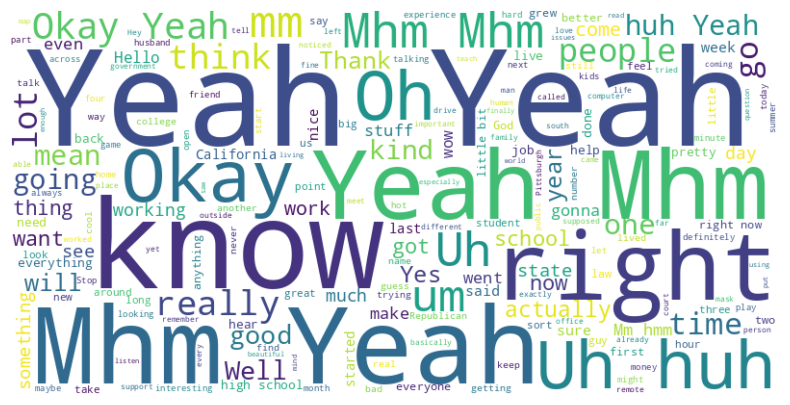

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(all_data_path):
    # Load the "all" processed file
    all_df = pd.read_csv(all_data_path)

    # Combine all unique utterance texts into a single string
    text_data = " ".join(all_df['utterance'].dropna().unique())

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_data)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()

# Usage
all_data_path = "/content/drive/MyDrive/coursework/Processed_CANDOR/all_text_prob_face_surprise_nod_no.csv"
generate_wordcloud(all_data_path)


# Preprocess to remove words with little meaning

Here we give an example of how you could clean the data by removind vertain words that might not be so illustrative.

- stopwords
- defined filtered words (modify if needed)

Notice that in the case of spoken language, discourse markers and words such as 'yeah', 'right' and so on, can be very important and carry a lot of meaning. So if you want to focus on spoken language use, you need consider this aspect more carefully.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


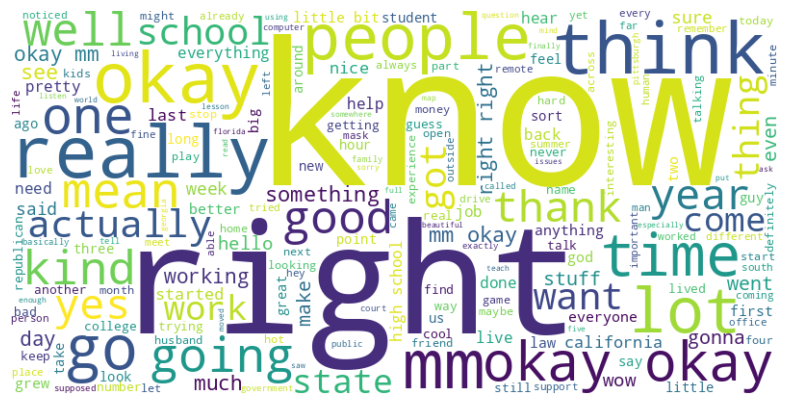

In [ ]:
from nltk.corpus import stopwords
import nltk
import re

# Download stopwords if not already downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Define custom filler words to remove
    filler_words = {'yeah', 'uh', 'mhm', 'oh', 'um', 'hmm', 'uh-huh', 'uh huh', 'huh'}
    # Define stopwords
    stop_words = set(stopwords.words('english'))

    # Combine filler words and stopwords
    all_stopwords = stop_words.union(filler_words)

    # Remove punctuation, convert to lowercase, and split into words
    words = re.findall(r'\b\w+\b', text.lower())

    # Filter out stopwords and filler words
    filtered_words = [word for word in words if word not in all_stopwords]

    # Return the preprocessed text as a single string
    return " ".join(filtered_words)

def generate_wordcloud(all_data_path):
    # Load the "all" processed file
    all_df = pd.read_csv(all_data_path)

    # Combine and preprocess all unique utterance texts
    text_data = " ".join(all_df['utterance'].dropna().unique())
    preprocessed_text = preprocess_text(text_data)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(preprocessed_text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()

# Usage
# content/drive/MyDrive/coursework/Processed_CANDOR
all_data_path = "/content/drive/MyDrive/coursework/Processed_CANDOR/all_text_prob_face_surprise_nod_no.csv"

generate_wordcloud(all_data_path)
